# 決定木

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import japanize_matplotlib

import seaborn as sns

In [3]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")
df_sample = pd.read_csv("./sample_submit.csv",header=None)
df_train = df_train.drop(["gameId"],axis="columns")
df_test = df_test.drop(["gameId"],axis="columns")
display(df_train.head())
display(df_test.head())
display(df_sample.head())
print(df_train.info())
print(df_test.info())

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,blueWins
0,0,5,8,6,0,0,14536,17256,0
1,1,10,1,5,0,0,14536,17863,0
2,0,3,10,2,0,0,17409,17256,0
3,1,7,10,8,0,0,19558,18201,0
4,0,4,9,4,0,0,17409,17256,0


,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,0,7,6,6,0,0,16961,18201
1,0,6,6,6,2,1,18513,18021
2,1,6,4,3,0,0,13475,17256
3,0,5,4,7,0,0,17409,17256
4,0,10,8,9,0,0,18117,18472


,0,1
0,9,1
1,15,1
2,18,1
3,23,0
4,31,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   blueFirstBlood       8000 non-null   int64
 1   blueKills            8000 non-null   int64
 2   blueDeaths           8000 non-null   int64
 3   blueAssists          8000 non-null   int64
 4   blueEliteMonsters    8000 non-null   int64
 5   blueDragons          8000 non-null   int64
 6   blueTotalGold        8000 non-null   int64
 7   blueTotalExperience  8000 non-null   int64
 8   blueWins             8000 non-null   int64
dtypes: int64(9)
memory usage: 562.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   blueFirstBlood       2000 non-null   int64
 1   blueKills            2000 non-null   int64
 2   blueDeaths        

In [5]:
print(len(df_train))
print(len(df_test))

8000
2000


<Axes: xlabel='blueKills', ylabel='blueAssists'>

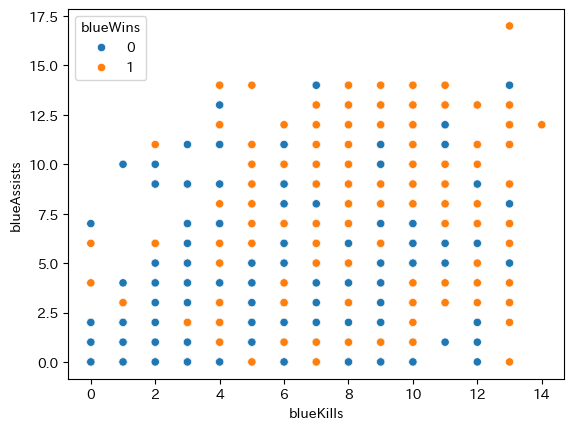

In [7]:
sns.scatterplot(x="blueKills",y="blueAssists",hue="blueWins",data=df_train)

<Axes: xlabel='blueKills', ylabel='blueDeaths'>

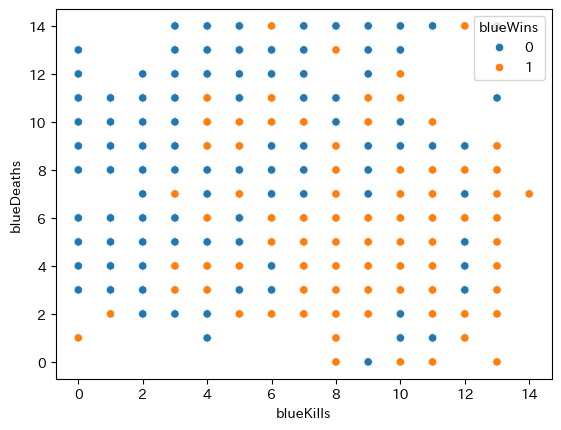

In [9]:
sns.scatterplot(x="blueKills",y="blueDeaths",hue="blueWins",data=df_train)

<Axes: xlabel='blueFirstBlood', ylabel='blueKills'>

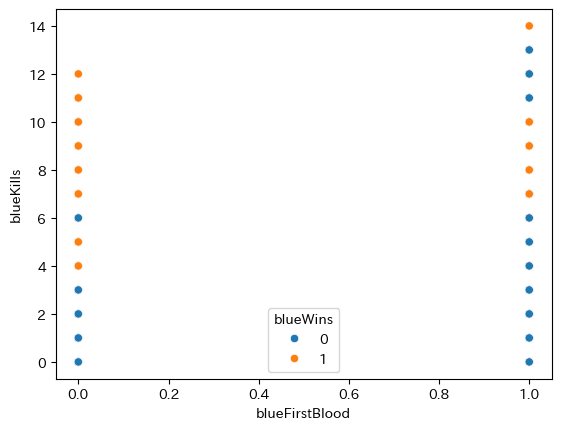

In [13]:
sns.scatterplot(x="blueFirstBlood",y="blueKills",hue="blueWins",data=df_train)

<Axes: xlabel='blueEliteMonsters', ylabel='blueDragons'>

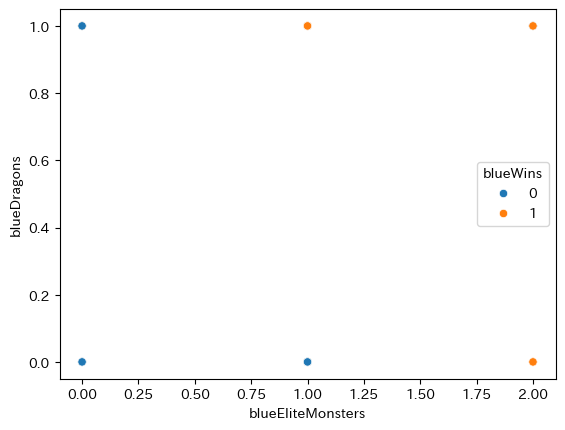

In [15]:
sns.scatterplot(x="blueEliteMonsters",y="blueDragons",hue="blueWins",data=df_train)

In [19]:
feature_col = ["blueFirstBlood","blueKills", "blueDeaths","blueAssists","blueEliteMonsters","blueDragons","blueTotalGold","blueTotalExperience"]
#feature_col = ["blueKills", "blueDeaths","blueAssists","blueTotalGold","blueTotalExperience"]

In [21]:
y = df_train["blueWins"]
#X = df_train.drop("blueWins",axis=1)
X = df_train[feature_col]
display(X.head())
display(y.head())

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,0,5,8,6,0,0,14536,17256
1,1,10,1,5,0,0,14536,17863
2,0,3,10,2,0,0,17409,17256
3,1,7,10,8,0,0,19558,18201
4,0,4,9,4,0,0,17409,17256


0    0
1    0
2    0
3    0
4    0
Name: blueWins, dtype: int64

In [89]:
model = DecisionTreeClassifier(max_depth=10,random_state=0,criterion="entropy")
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [91]:
#feature_col = ["blueFirstBlood","blueKills", "blueDeaths","blueAssists","blueEliteMonsters","blueDragons","blueTotalGold","blueTotalExperience"]
#feature_col = ["blueFirstBlood","blueKills", "blueDeaths","blueAssists"]
df_test["pred_blueWin"] = 0
display(df_test.head())
y_test = df_test["pred_blueWin"]
X_test = df_test[feature_col]

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience,pred_blueWin
0,0,7,6,6,0,0,16961,18201,0
1,0,6,6,6,2,1,18513,18021,0
2,1,6,4,3,0,0,13475,17256,0
3,0,5,4,7,0,0,17409,17256,0
4,0,10,8,9,0,0,18117,18472,0


In [103]:
y_train_pred = model.predict(X)
display(y_train_pred)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_train_pred)

0.830625

In [107]:
score_te = model.score(X,y_train_pred)
print(score_te)

1.0


In [109]:
y_pred = model.predict(X_test)
display(y_pred)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

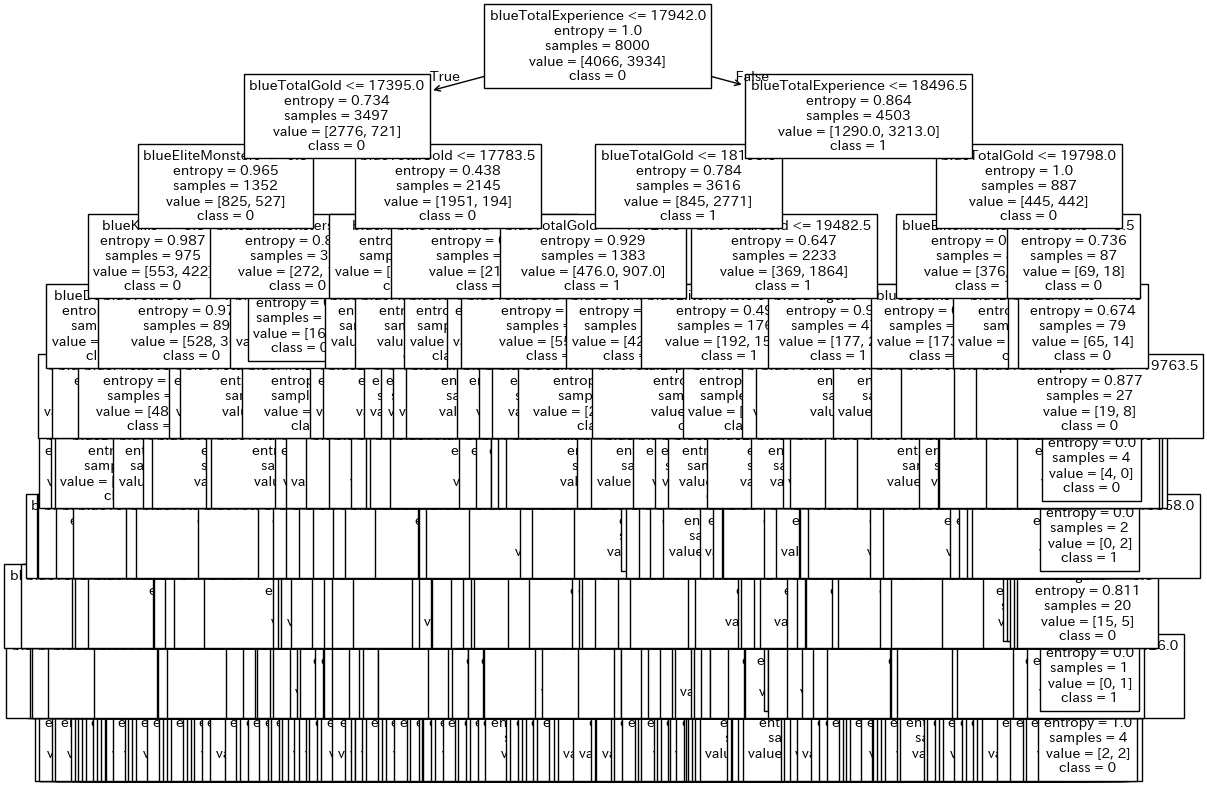

In [99]:
plt.figure(figsize=(13, 10))
plot_tree(
    model,
    fontsize=10,
    feature_names=feature_col,
    #feature_names=["blueFirstBlood","blueKills", "blueDeaths","blueAssists","blueEliteMonsters","blueDragons","blueTotalGold","blueTotalExperience"],
    class_names=["0", "1"]
)
plt.show()

In [101]:
df_sample[1] = y_pred
df_sample.to_csv("./sample_submit.csv",header=None,index=False)